In [24]:
from spmf import Spmf
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import ast
pd.options.plotting.backend = "plotly"
import plotly.express as px
from chart_studio import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.subplots as sp
pd.options.display.max_colwidth = None
pd.set_option('display.max_rows', 70)

In [2]:
data = pd.read_csv('sorted_coded_data.csv')

In [3]:
data

,package_name,user_id,start_time,end_time,time_spend,app_code
0,com.facebook.katana,0,0,441,441,19968
1,com.android.chrome,0,441,1012,571,7649
2,com.google.android.apps.photos,0,1012,1032,20,23916
3,com.facebook.katana,0,1042,1502,460,19968
4,com.whatsapp,0,1512,1572,60,53003
...,...,...,...,...,...,...
254450417,com.google.android.googlequicksearchbox,9999,29207214,29207244,30,23949
254450418,com.android.chrome,9999,29207244,29207284,40,7649
254450419,com.google.android.apps.docs,9999,29207284,29207294,10,23875
254450420,com.microsoft.office.outlook,9999,29213184,29213213,29,33357


# User 0

In [37]:
user_0=data[data.user_id==0]
user_0['start_time']=user_0.start_time/60/60

<ipython-input-37-3cf888abea03>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Initial statistics

In [16]:
print("number of observations:",user_0.shape[0])
print("number of distinct app:",user_0.app_code.nunique())
print("time period:",user_0.end_time.max()/60/60/24,"days")
print("most used apps:")
user_0.groupby('package_name').size().nlargest(10)

number of observations: 11339
number of distinct app: 66
time period: 233.9002546296296 days
most used apps:


package_name
com.facebook.katana                  2593
com.android.chrome                   1375
com.viber.voip                       1127
com.instagram.android                1044
com.sonyericsson.album                649
com.facebook.orca                     561
bg.abv.andro.emailapp                 513
com.google.android.apps.translate     500
com.google.android.youtube            426
com.whatsapp                          331
dtype: int64

We now limit the time period to make it easier to observe the data.

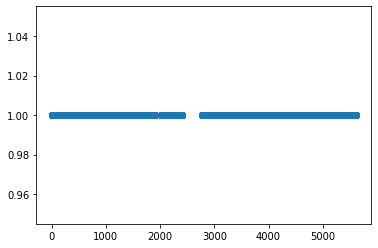

In [38]:
plt.scatter(user_0.start_time,np.ones(user_0.shape[0]))
plt.show()

we select the first week

In [39]:
user_0[user_0.start_time<=24]

,package_name,user_id,start_time,end_time,time_spend,app_code
0,com.facebook.katana,0,0.000000,441,441,19968
1,com.android.chrome,0,0.122500,1012,571,7649
2,com.google.android.apps.photos,0,0.281111,1032,20,23916
3,com.facebook.katana,0,0.289444,1502,460,19968
4,com.whatsapp,0,0.420000,1572,60,53003
5,com.google.android.youtube,0,0.439444,1712,130,23967
6,com.whatsapp,0,0.475556,1788,76,53003
7,com.whatsapp,0,0.606389,2221,38,53003
8,com.whatsapp,0,0.958056,3579,130,53003
9,com.facebook.katana,0,0.994167,3669,90,19968


In [49]:
#df = px.data.iris()
fig = px.scatter(user_0[user_0.start_time<=24], x="start_time", y=np.ones(user_0[user_0.start_time<=24].shape[0]), color="package_name",
                 size='time_spend')
fig.update_layout(
    xaxis_title="Time (hours)",
    yaxis_title="")
fig.update_yaxes(visible=False)

fig.show()

## Sleep time distribution

We start by calculating the sleep time.

In [52]:
def join_times(x):
    startdf = pd.DataFrame({'time':x['start_time'], 'what':1})
    enddf = pd.DataFrame({'time':x['end_time'], 'what':-1})
    mergdf = pd.concat([startdf, enddf]).sort_values(['time','what'])
    mergdf['running'] = mergdf['what'].cumsum()
    mergdf['new_sequence'] = mergdf['running'].eq(1) & mergdf['what'].eq(1)
    mergdf['sequence_number'] = mergdf['new_sequence'].cumsum()
    x['sequence_number'] = mergdf['sequence_number'].loc[mergdf['what'].eq(1)]
    return x['sequence_number']

In [53]:
data['sequence_number']=data.groupby('user_id').apply(join_times).reset_index().drop(['user_id','level_1'], axis=1).values
data=pd.merge(data,data.groupby(['user_id','sequence_number']).agg({'start_time':'min','end_time':'max'}).reset_index().rename(columns={'end_time':'sequence_end_time','start_time':'sequence_Start_time'}),how='left', on=['user_id','sequence_number'])
data['sleep_time']=data.start_time-data.sequence_end_time.shift(1,fill_value=0) 

In [58]:
data.loc[data[data['sleep_time']<0].index,'sleep_time']=0

In [59]:
data.to_csv("sorted_coded_sleep_time.csv",index=False)

In [62]:
user_0=data[data.user_id==0]

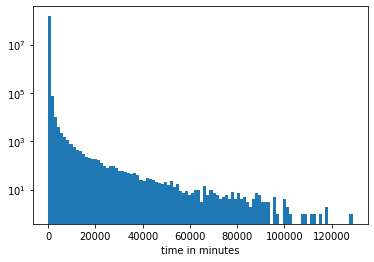

In [70]:
plt.hist(data[data.sleep_time>0].sleep_time/60,bins=100)
plt.xlabel('time in minutes')
plt.yscale('log')

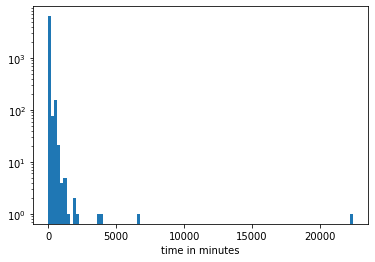

In [76]:
plt.hist(user_0[user_0.sleep_time>0].sleep_time/60,bins=100)
plt.xlabel('time in minutes')
plt.yscale('log')

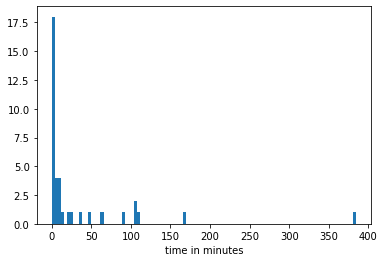

In [74]:
plt.hist(user_0[user_0.start_time<=60*60*24][user_0[user_0.start_time<=60*60*24].sleep_time>0].sleep_time/60,bins=100)
plt.xlabel('time in minutes')
plt.show()

In [78]:
print("median sleep time for full data set:",data[data.sleep_time>0].sleep_time.median())
print("median sleep time for full data set:",data[(data.sleep_time>0)&(data.sleep_time<8*60*60)].sleep_time.median())
print("median sleep time for full data set:",data[(data.sleep_time<8*60*60)].sleep_time.median())

median sleep time for full data set: 306.0
median sleep time for full data set: 293.0
median sleep time for full data set: 20.0


In [80]:
print("median sleep time for user 0:",user_0[user_0.sleep_time>0].sleep_time.median())
print("median sleep time less than 8 hours for user 0:",user_0[(user_0.sleep_time>0)&(user_0.sleep_time<8*60*60)].sleep_time.median())
print("median sleep time inclunding 0 but less than 8 hours for user 0:",user_0[(user_0.sleep_time<8*60*60)].sleep_time.median())

median sleep time for user 0: 367.0
median sleep time less than 8 hours for user 0: 336.0
median sleep time inclunding 0 but less than 8 hours for user 0: 10.0


### Calculating sessions based on the different thresholds

In [82]:
user_0['new_session'] = user_0.sleep_time.apply(lambda s: s>293.0)
user_0['session_293'] = user_0.new_session.cumsum().astype('int')

<ipython-input-82-27c4ba8147a3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-82-27c4ba8147a3>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [83]:
user_0['new_session'] = user_0.sleep_time.apply(lambda s: s>20)
user_0['session_20'] = user_0.new_session.cumsum().astype('int')

<ipython-input-83-ad6a97ab519b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-83-ad6a97ab519b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [103]:
user_0['start_time']=user_0.start_time/60

<ipython-input-103-edb868206056>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [119]:
user_0["session_20"]=user_0["session_20"].astype(str)
user_0["session_293"]=user_0["session_293"].astype(str)

<ipython-input-119-0ab341e201f4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-119-0ab341e201f4>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [164]:
fig = px.scatter(user_0[user_0.start_time<=12], x="start_time", y=np.ones(user_0[user_0.start_time<=12].shape[0]),color=
                'session_20',height=200)
fig.update_layout(
    xaxis_title="Time (hours)",
    yaxis_title="",
showlegend=False)
fig.update_layout(xaxis_range=[-0.1,12])
fig.update_yaxes(visible=False)
fig.show()

In [163]:
fig = px.scatter(user_0[user_0.start_time<=12], x="start_time", y=np.ones(user_0[user_0.start_time<=12].shape[0]),color=
                'session_293',height=200)
fig.update_layout(
    xaxis_title="Time (hours)",
    yaxis_title=""
,showlegend=False)
fig.update_layout(xaxis_range=[-0.1,12])
fig.update_yaxes(visible=False)
fig.show()

In [ ]:
session_lengths_20s=user_0.groupy('session_20').agg({'':'size'})
session_lengths_20s.groupby()

In [173]:
user_0.groupby('session_20').size()#.agg({'':'size'})

session_20
0       7
1       1
10      1
100     3
1000    1
       ..
995     1
996     1
997     1
998     3
999     2
Length: 5475, dtype: int64

In [189]:
test=user_0.groupby('session_20').agg({'app_code':'size'}).rename(columns={'app_code':'session_length'}).groupby('session_length').size()

In [199]:
fig = px.bar(x=test.index.values, y = test.values,width=625,height=400)
fig.update_layout(
    xaxis_title="Number of apps in session",
    yaxis_title="Number of sessions")
fig.update_xaxes(type='category')

The plot above showing that there are 2862 sessions of length 1 when 20 seconds sleep threshold is used.

In [196]:
session_lengths_293=user_0.groupby('session_293').agg({'app_code':'size'}).rename(columns={'app_code':'session_length'}).groupby('session_length').size()

In [198]:
fig = px.bar(x=session_lengths_293.index.values, y = session_lengths_293.values,width=625,height=400)
fig.update_layout(
    xaxis_title="Number of apps in session",
    yaxis_title="Number of sessions")
fig.update_xaxes(type='category')

### Combine repating apps within sessions.

In [201]:
user_0_20s=user_0.copy()

In [203]:
user_0_20s["previous_app_code"]=user_0_20s.groupby(["session_20"]).app_code.shift(1)

In [204]:
user_0_20s=user_0_20s[(user_0_20s.previous_app_code==user_0_20s.app_code) | (user_0_20s.app_code==user_0_20s.groupby(['session_20']).app_code.shift(-1))]

In [206]:
user_0_20s['new_event'] = user_0_20s.previous_app_code!=user_0_20s.app_code

<ipython-input-206-738d92dde982>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [207]:
user_0_20s['event'] = user_0_20s.groupby(['session_20']).new_event.cumsum().astype('int')

<ipython-input-207-3d8e6d61ea42>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [208]:
data2_grouped = user_0_20s.groupby(['session_20','event']).agg({'end_time':'max'})

data2_grouped = data2_grouped.reset_index()

data2_grouped = data2_grouped.rename(columns={'end_time':'event_end_time'})

data3 = pd.merge(user_0_20s, data2_grouped, how='left', on=['session_20','event'])

data3 = data3[data3['end_time'] == data3['event_end_time']]

#because in the same event more apps can be closed at once.
data3=data3.drop_duplicates(subset=['session_20','event'], keep='last')

In [209]:
max_index=user_0_20s.iloc[data3.index].index

In [210]:
data2_grouped = user_0_20s.groupby(['session_20','event']).agg({'start_time':'min'})

data2_grouped = data2_grouped.reset_index()

data2_grouped = data2_grouped.rename(columns={'start_time':'event_start_time'})

data3 = pd.merge(user_0_20s, data2_grouped, how='left', on=['session_20','event'])

data3 = data3[data3['start_time'] == data3['event_start_time']]

#because in the same event more apps can be opened at once.
data3=data3.drop_duplicates(subset=['session_20','event'], keep='last')

In [211]:
min_index=user_0_20s.iloc[data3.index].index

In [212]:
user_0_20s_final=user_0.copy()
user_0_20s_final["previous_app_code"]=user_0_20s_final.groupby(["session_20"]).app_code.shift(1)

In [213]:
user_0_20s_final.loc[min_index,"end_time"]=user_0_20s_final.loc[max_index].set_index(min_index).end_time

In [ ]:
#Next time use this instead.
#user_0_20s_final.loc[max_index,"start_time"]=user_0_20s_final.loc[min_index].set_index(max_index).start_time

In [214]:
user_0_20s_final=user_0_20s_final.drop(set(user_0_20s.index)-set(min_index))
#instead
#user_0_20s_final=user_0_20s_final.drop(set(user_0_20s.index)-set(max_index))

In [215]:
len(user_0.index)-(len(user_0_20s.index)-len(min_index))==len(user_0_20s_final.index)

True

In [216]:
user_0_20s_final['time_spend']=user_0_20s_final['end_time']-user_0_20s_final['start_time']

In [217]:
user_0_20s_final=user_0_20s_final.drop('previous_app_code',axis=1)

In [ ]:
#Havent been run yet.
#user_0_20s_final['sleep_time']=user_0_20s_final.start_time-data3.sequence_end_time.shift(1,fill_value=0)
#data3.loc[data3[data3['sleep_time']<0].index,'sleep_time']=0

The process is now repeated but based on the 293 sec. sleep threshold.

In [220]:
user_0_293s=user_0.copy()
user_0_293s["previous_app_code"]=user_0_293s.groupby(["session_293"]).app_code.shift(1)
#Get relevant rows
user_0_293s=user_0_293s[(user_0_293s.previous_app_code==user_0_293s.app_code) | (user_0_293s.app_code==user_0_293s.groupby(['session_293']).app_code.shift(-1))]

user_0_293s['new_event'] = user_0_293s.previous_app_code!=user_0_293s.app_code
user_0_293s['event'] = user_0_293s.groupby(['session_293']).new_event.cumsum().astype('int')

In [221]:
data2_grouped = user_0_293s.groupby(['session_293','event']).agg({'end_time':'max'})

data2_grouped = data2_grouped.reset_index()

data2_grouped = data2_grouped.rename(columns={'end_time':'event_end_time'})

data3 = pd.merge(user_0_293s, data2_grouped, how='left', on=['session_293','event'])

data3 = data3[data3['end_time'] == data3['event_end_time']]

#because in the same event more apps can be closed at once.
data3=data3.drop_duplicates(subset=['session_293','event'], keep='last')

max_index=user_0_293s.iloc[data3.index].index

In [222]:
data2_grouped = user_0_293s.groupby(['session_293','event']).agg({'start_time':'min'})

data2_grouped = data2_grouped.reset_index()

data2_grouped = data2_grouped.rename(columns={'start_time':'event_start_time'})

data3 = pd.merge(user_0_293s, data2_grouped, how='left', on=['session_293','event'])

data3 = data3[data3['start_time'] == data3['event_start_time']]

#because in the same event more apps can be opened at once.
data3=data3.drop_duplicates(subset=['session_293','event'], keep='last')

min_index=user_0_293s.iloc[data3.index].index

In [223]:
user_0_293s_final=user_0.copy()
user_0_293s_final["previous_app_code"]=user_0_293s_final.groupby(["session_293"]).app_code.shift(1)

In [224]:
user_0_293s_final.loc[max_index,"start_time"]=user_0_293s_final.loc[min_index].set_index(max_index).start_time

In [225]:
user_0_293s_final=user_0_293s_final.drop(set(user_0_293s.index)-set(max_index))

In [227]:
len(user_0.index)-(len(user_0_293s.index)-len(max_index))==len(user_0_293s_final.index)

True

In [228]:
user_0_293s_final['time_spend']=user_0_293s_final['end_time']-user_0_293s_final['start_time']

In [229]:
user_0_293s_final=user_0_293s_final.drop('previous_app_code',axis=1)

In [ ]:
#Havent been run yet.
#user_0_20s_final['sleep_time']=user_0_20s_final.start_time-data3.sequence_end_time.shift(1,fill_value=0)
#data3.loc[data3[data3['sleep_time']<0].index,'sleep_time']=0

After having merged the repeatin events, we look at the updated distributions of session length

In [263]:
updated_session_lengths_20=user_0_20s_final.groupby('session_20').agg({'app_code':'size'}).rename(columns={'app_code':'session_length'}).groupby('session_length').size()
fig = px.bar(x=updated_session_lengths_20.index.values, y = updated_session_lengths_20.values,width=625,height=400)
fig.update_layout(
    xaxis_title="Number of apps in session",
    yaxis_title="Number of sessions")
fig.update_xaxes(type='category')

In [261]:
updated_session_lengths_293=user_0_293s_final.groupby('session_293').agg({'app_code':'size'}).rename(columns={'app_code':'session_length'}).groupby('session_length').size()
fig = px.bar(x=updated_session_lengths_293.index.values, y = updated_session_lengths_293.values,width=625,height=400)
fig.update_layout(
    xaxis_title="Number of apps in session",
    yaxis_title="Number of sessions")
fig.update_xaxes(type='category')

After the merge of repeating events it is observed that the session lengths are shorter.

## Infrequent apps

We start by calculating the infrequency based on the app the user.

In [268]:
user_0_293s_final

,package_name,user_id,start_time,end_time,time_spend,app_code,sequence_number,sequence_Start_time,sequence_end_time,sleep_time,new_session,session_293,session_20
0,com.facebook.katana,0,0.000000,441,4.410000e+02,19968,1,0,441,0,False,0,0
1,com.android.chrome,0,0.122500,1012,1.011878e+03,7649,2,441,1012,0,False,0,0
2,com.google.android.apps.photos,0,0.281111,1032,1.031719e+03,23916,3,1012,1032,0,False,0,0
3,com.facebook.katana,0,0.289444,1502,1.501711e+03,19968,4,1042,1502,10,False,0,0
4,com.whatsapp,0,0.420000,1572,1.571580e+03,53003,5,1512,1572,10,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11334,com.jb.zcamera,0,5613.372500,20208151,2.020254e+07,28268,10360,20208141,20208151,30514,True,3503,5474
11335,com.android.chrome,0,5613.378056,20208512,2.020290e+07,7649,10361,20208161,20208512,10,False,3503,5474
11336,com.facebook.katana,0,5613.475556,20208772,2.020316e+07,19968,10362,20208512,20208772,0,False,3503,5474
11337,com.google.android.apps.translate,0,5613.547778,20208782,2.020317e+07,23926,10363,20208772,20208782,0,False,3503,5474


In [272]:
app_count_user_0_293=user_0_293s_final.groupby('package_name').size()

In [298]:
app_count_user_0_293.nlargest(10)

package_name
com.facebook.katana                  2363
com.android.chrome                   1212
com.instagram.android                 989
com.viber.voip                        983
com.sonyericsson.album                575
com.facebook.orca                     522
bg.abv.andro.emailapp                 510
com.google.android.apps.translate     415
com.google.android.youtube            380
com.whatsapp                          306
dtype: int64

In [299]:
app_count_user_0_293.nsmallest(10)

package_name
com.alibaba.aliexpresshd                 1
com.dreamob.android.enphv                1
com.fotoable.faceswap.c403               1
falcofinder.android.fce                  1
flv.mobile.android                       1
net.zedge.android                        1
subu.cambridgedictionary                 1
com.acobot.en                            2
com.chaisanamobile.kitchendesignideas    3
com.dekovir.pixwords                     3
dtype: int64

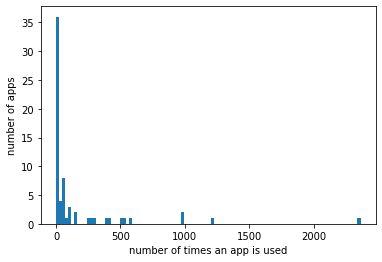

In [304]:
plt.hist(app_count_user_0_293,bins=100)
#plt.yscale('log')
plt.xlabel("number of times an app is used")
plt.ylabel("number of apps")
plt.show()

In [308]:
app_count_user_0_20=user_0_20s_final.groupby('package_name').size()

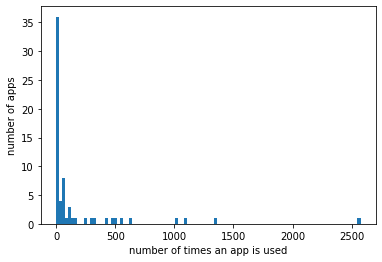

In [309]:
plt.hist(app_count_user_0_20,bins=100)
#plt.yscale('log')
plt.xlabel("number of times an app is used")
plt.ylabel("number of apps")
plt.show()

We can conclude that for user one, have a few apps that are used very frequent, bot most apps are not used that often.

In [310]:
app_count_all=data.groupby('package_name').size()

## Applying the infrequency threshold(0.01) for individual 

### What´s apps been recognized as infrequent
-include comparision to what is labeled as infrequent for 0.01 threshold for whole data set.

###  Whether it will affect the sessions after we remove the infrequecy app.

### What frequent patterns are returned (with constant min sup.)